In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading the dataset
df = pd.read_csv("ufc_fighters.csv")

# 2. Basic description of the data set 
print(df.head())
print(df.info())
print(df.describe())

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


                name    nickname  wins  losses  draws  height_cm  \
0    Robert Drysdale         NaN     7       0      0     190.50   
1  Daniel McWilliams  The Animal    15      37      0     185.42   
2         Dan Molina         NaN    13       9      0     177.80   
3          Paul Ruiz         NaN     7       4      0     167.64   
4    Collin Huckbody      All In     8       2      0     190.50   

   weight_in_kg  reach_in_cm    stance date_of_birth  \
0         92.99          NaN  Orthodox    1981-10-05   
1         83.91          NaN       NaN           NaN   
2         97.98          NaN       NaN           NaN   
3         61.23          NaN       NaN           NaN   
4         83.91       193.04  Orthodox    1994-09-29   

   significant_strikes_landed_per_minute  significant_striking_accuracy  \
0                                   0.00                            0.0   
1                                   3.36                           77.0   
2                            

In [7]:
# 3.  missing values
df = df.drop_duplicates()
df = df.dropna(subset=["name"]) 
df.fillna({"stance": "Unknown"}, inplace=True)  # Replace missing stance with Unknown
df.fillna({"date_of_birth": "Unknown"}, inplace=True)  # Replace missing dob with Unknown


In [10]:
# 4. Fixing possible data type issues

def remove_outliers_iqr(df, column):
    """
    Removes outliers from a given column of a DataFrame using the IQR method.
    """
    Q1 = df[column].quantile(0.25)   
    Q3 = df[column].quantile(0.75)   
    IQR = Q3 - Q1                   

    lower_bound = Q1 - 1.5 * IQR    
    upper_bound = Q3 + 1.5 * IQR     

  
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Removing outliers
df = remove_outliers_iqr(df, 'height_cm')
df = remove_outliers_iqr(df, 'weight_in_kg')
df = remove_outliers_iqr(df, 'reach_in_cm')

In [11]:
# 5. Feature Engineering
df["Total_Fights"] = df["wins"] + df["losses"] + df["draws"]
df["Win_Ratio"] = df["wins"] / df["Total_Fights"]

In [12]:
# 6. Visualization
sns.set(style="whitegrid")

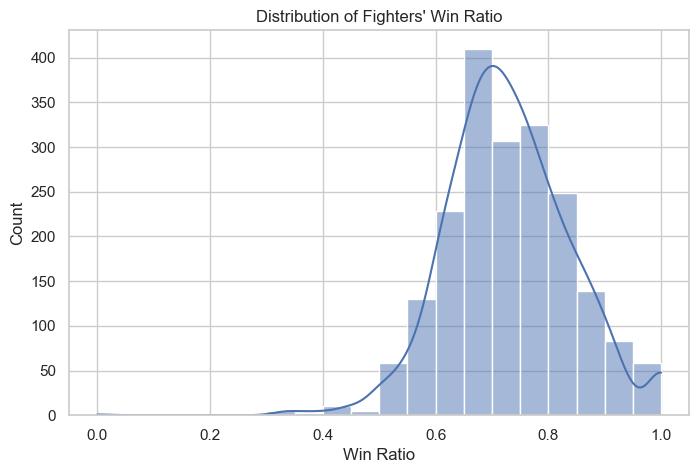

In [13]:
# Win Ratio distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Win_Ratio"].dropna(), bins=20, kde=True)
plt.title("Distribution of Fighters' Win Ratio")
plt.xlabel("Win Ratio")
plt.ylabel("Count")
plt.show()

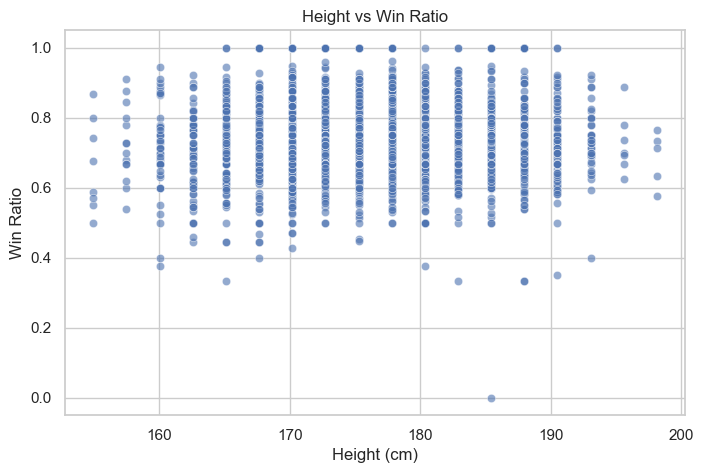

In [15]:
# Height vs Win Ratio
plt.figure(figsize=(8,5))
sns.scatterplot(x="height_cm", y="Win_Ratio", data=df, alpha=0.6)
plt.title("Height vs Win Ratio")
plt.xlabel("Height (cm)")
plt.ylabel("Win Ratio")
plt.show()

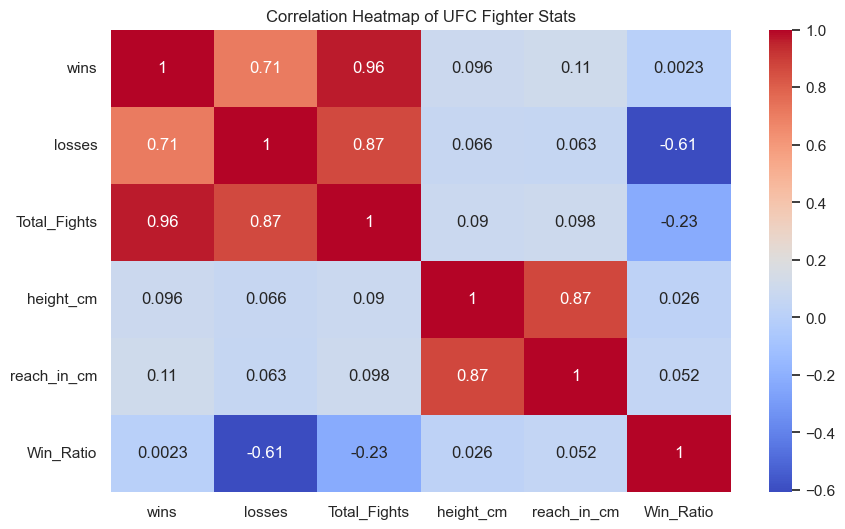

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[["wins","losses","Total_Fights","height_cm","reach_in_cm","Win_Ratio"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of UFC Fighter Stats")
plt.show()

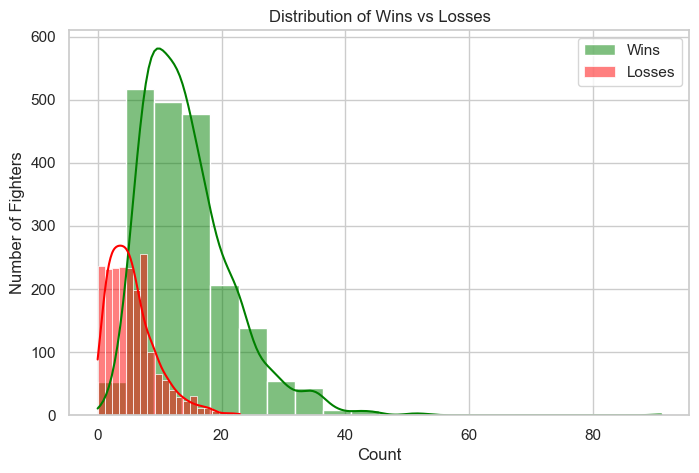

In [18]:
#some win to loss dist
plt.figure(figsize=(8,5))
sns.histplot(df["wins"], bins=20, kde=True, color="green", label="Wins")
sns.histplot(df["losses"], bins=20, kde=True, color="red", label="Losses")
plt.title("Distribution of Wins vs Losses")
plt.xlabel("Count")
plt.ylabel("Number of Fighters")
plt.legend()
plt.show()